In [6]:
import matplotlib.pyplot as plt
import numpy as np

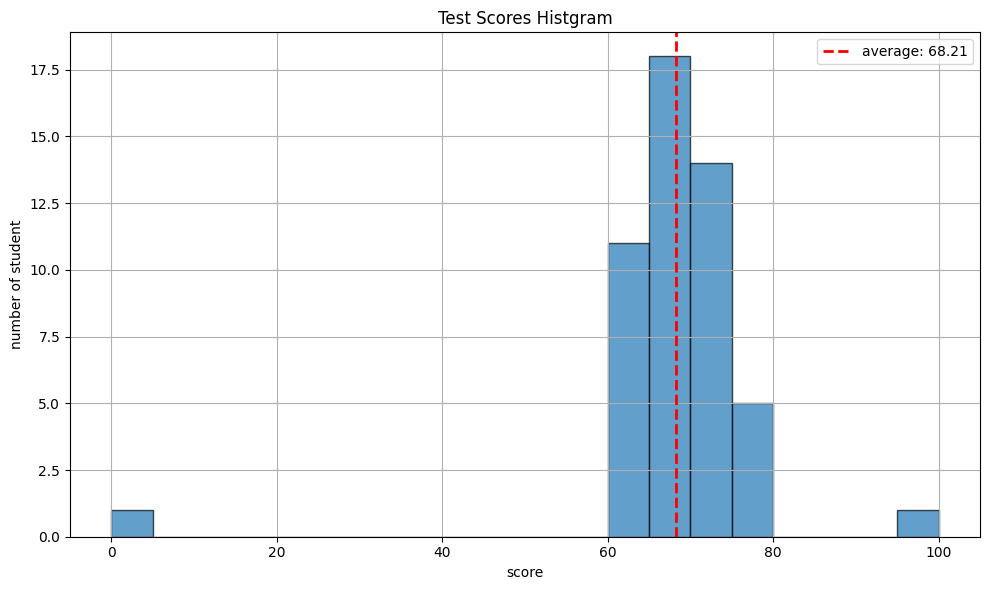

In [7]:
# データ生成
np.random.seed(42)
main_data = np.random.normal(loc=70, scale=5, size=48)  # 通常データ
outliers = np.array([0, 100])  # 外れ値
data = np.concatenate([main_data, outliers])

# 平均値の計算
mean_value = np.mean(data)

# ヒストグラム描画
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'average: {mean_value:.2f}')
plt.title('Test Scores Histgram')
plt.xlabel('score')
plt.ylabel('number of student')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


パターン1：外れ値が平均値を右に引っ張る構成（問題例で使用）
- 本体は60〜80点に集中
- 外れ値：0点と100点
- 平均値は中央値より右にずれる

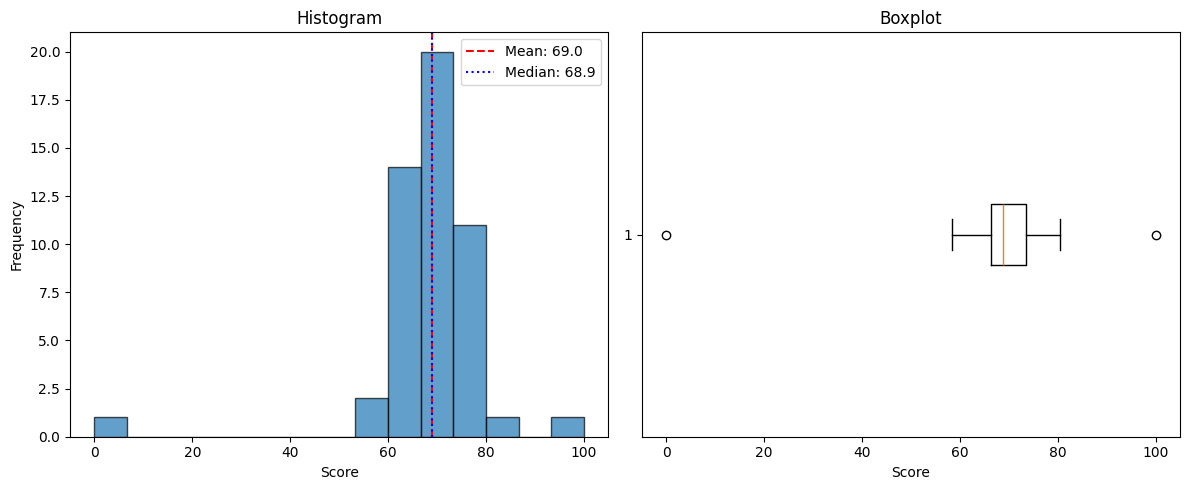

In [8]:
np.random.seed(1)
data_core = np.random.normal(loc=70, scale=5, size=48)
outliers = np.array([0, 100])
data = np.concatenate([data_core, outliers])

mean = np.mean(data)
median = np.median(data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ヒストグラム
axs[0].hist(data, bins=15, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Frequency")
axs[0].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.1f}")
axs[0].axvline(median, color='blue', linestyle=':', label=f"Median: {median:.1f}")
axs[0].legend()

# 箱ひげ図
axs[1].boxplot(data, vert=False, showfliers=True)
axs[1].set_title("Boxplot")
axs[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


パターン2：外れ値がない（または最小限）で平均≒中央値になる構成
- 本体：60〜80点（正規分布）
- 外れ値：なし
- 平均と中央値が一致、外れ値の影響なしを体感できる

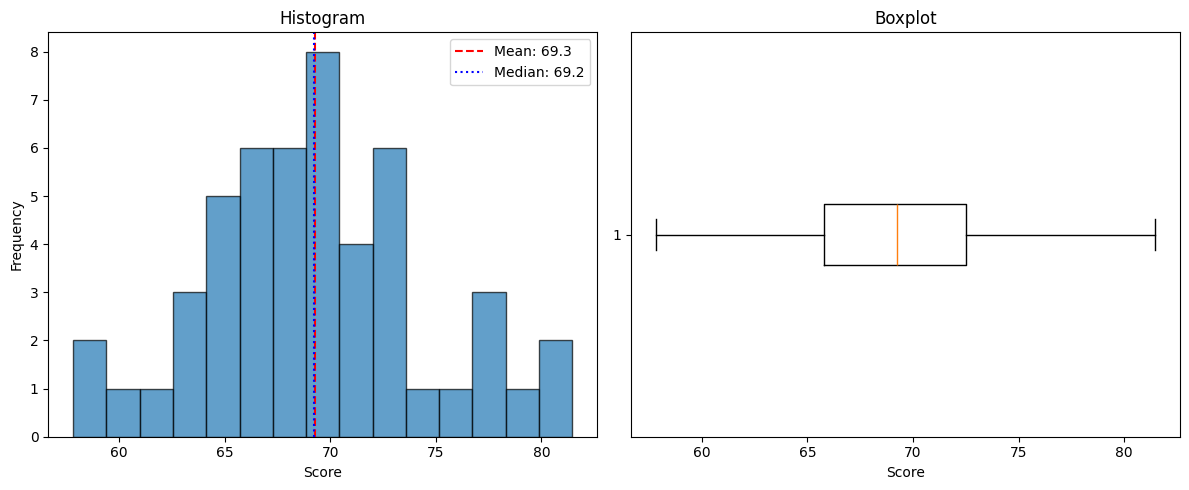

In [9]:
np.random.seed(2)
data = np.random.normal(loc=70, scale=5, size=50)

mean = np.mean(data)
median = np.median(data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(data, bins=15, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Frequency")
axs[0].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.1f}")
axs[0].axvline(median, color='blue', linestyle=':', label=f"Median: {median:.1f}")
axs[0].legend()

axs[1].boxplot(data, vert=False, showfliers=True)
axs[1].set_title("Boxplot")
axs[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


パターン3：外れ値が左側にある（0点や極端な低得点）場合
- 本体：70〜85点（やや高得点寄り）

- 外れ値：0点や10点など

- 平均が左に引っ張られ、中央値との差を確認できる

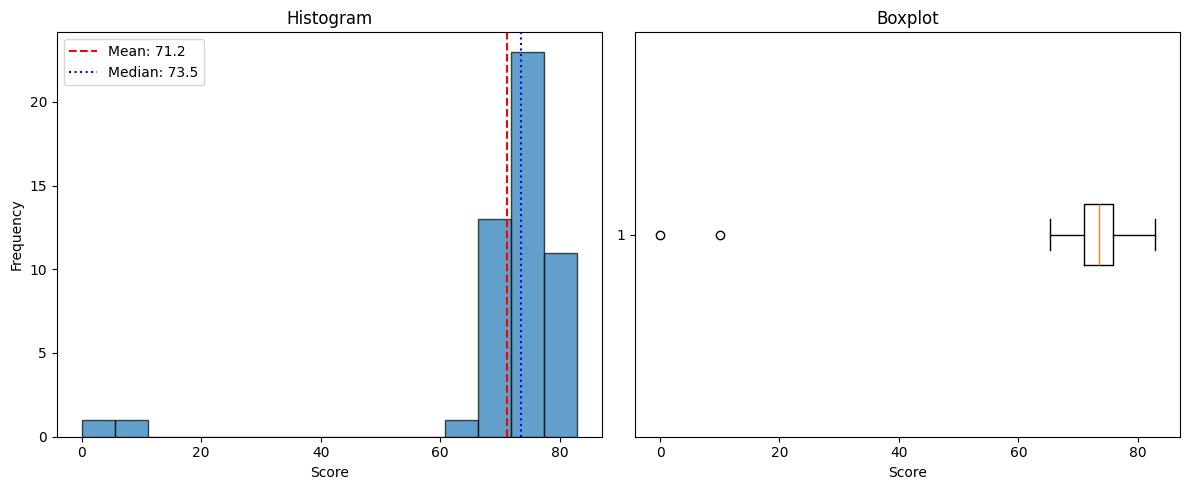

In [10]:
np.random.seed(3)
data_core = np.random.normal(loc=75, scale=4, size=48)
outliers = np.array([0, 10])
data = np.concatenate([data_core, outliers])

mean = np.mean(data)
median = np.median(data)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(data, bins=15, edgecolor='black', alpha=0.7)
axs[0].set_title("Histogram")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Frequency")
axs[0].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.1f}")
axs[0].axvline(median, color='blue', linestyle=':', label=f"Median: {median:.1f}")
axs[0].legend()

axs[1].boxplot(data, vert=False, showfliers=True)
axs[1].set_title("Boxplot")
axs[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


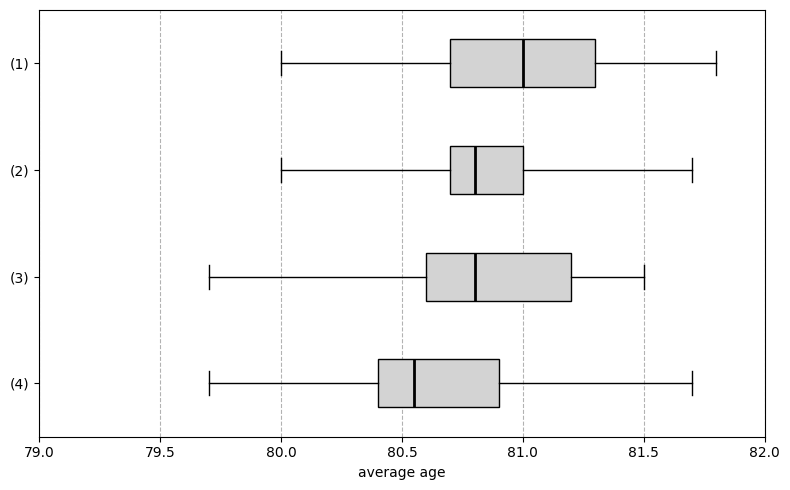

In [34]:
import matplotlib.pyplot as plt

# 各カテゴリの統計値（最小値, Q1, Q2, Q3, 最大値）
data_stats = [
    [79.7, 80.4, 80.55, 80.9, 81.7], # これがあたり
    [79.7, 80.6, 80.8, 81.2, 81.5],
    [80.0, 80.7, 80.8, 81.0, 81.7],
    [80.0, 80.7, 81.0, 81.3, 81.8],
]

# 箱ひげ図用に変換
# matplotlibのbxp()関数形式で使用（事前に構造体にしておく）
box_data = []
for i, stats in enumerate(data_stats):
    box_data.append({
        'label': str(i),
        'whislo': stats[0],  # 最小値
        'q1': stats[1],      # 第1四分位
        'med': stats[2],     # 中央値
        'q3': stats[3],      # 第3四分位
        'whishi': stats[4],  # 最大値
        'fliers': []         # 外れ値なし
    })

# 描画
fig, ax = plt.subplots(figsize=(8, 5))

# 横向きの箱ひげ図を描く
ax.bxp(box_data, vert=False, patch_artist=True,
       medianprops=dict(color='black', linewidth=2),
       boxprops=dict(facecolor='lightgray', edgecolor='black'),
       whiskerprops=dict(color='black'),
       capprops=dict(color='black'))

# 軸設定
ax.set_xlabel("average age")
ax.set_xlim(79, 82)
ax.set_yticks(range(1, 5))
ax.set_yticklabels(["("+str(i)+")" for i in range(4, 0, -1)])

# グリッド
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()


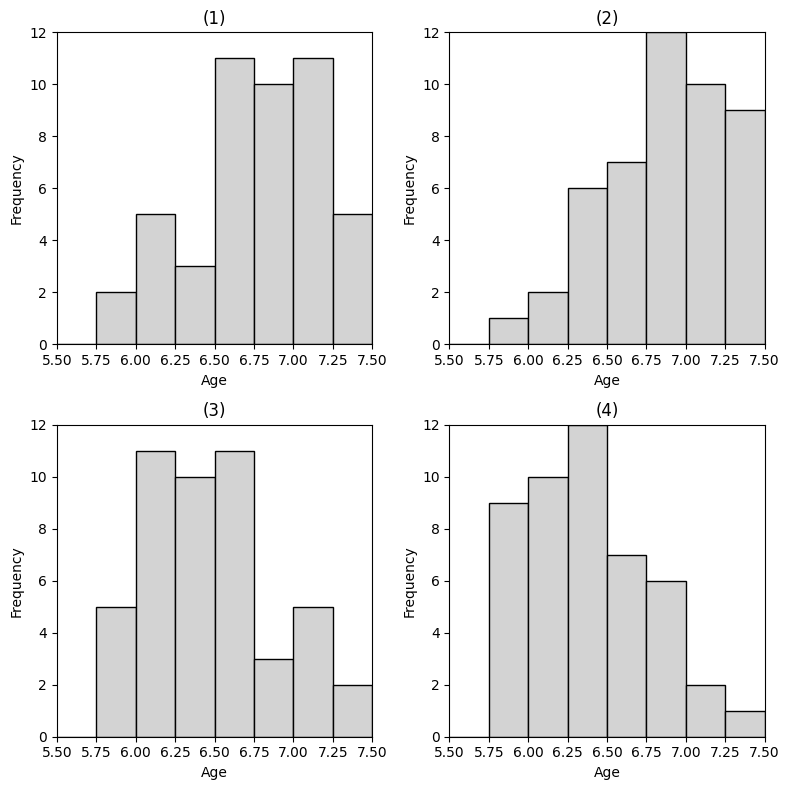

In [28]:
import matplotlib.pyplot as plt

# 階級の境界
bin_edges = [5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5]
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

# 各ヒストグラムの度数データ
freqs_0 = [0, 2, 5, 3, 11, 10, 11, 5]   # 図0
freqs_1 = [0, 1, 2, 6, 7, 12, 10, 9]     # 図1（右肩上がり）
freqs_2 = [0, 5, 11, 10, 11, 3, 5, 2]    # 図2（両肩下がり）
freqs_3 = [0, 9, 10, 12, 7, 6, 2, 1]    # 図3（左肩上がり）

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

titles = ["(1)", "(2)", "(3)", "(4)"]
all_freqs = [freqs_0, freqs_1, freqs_2, freqs_3]

for ax, title, freq in zip(axes.flatten(), titles, all_freqs):
    ax.bar(bin_centers, freq, width=0.25, color='lightgray', edgecolor='black')
    ax.set_xlim(5.5, 7.5)
    ax.set_ylim(0, 12)
    ax.set_xticks(bin_edges)
    ax.set_title(f"{title}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()
